<a href="https://colab.research.google.com/github/MWFK/TimeSeries_Sequence_with_TensorFlow/blob/main/0-%20WindowdMA_TraillingCentered.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Source

https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/

# Centered Moving Average

The value at time (t) is calculated as the average of raw observations at, before, and after time (t).

For example, a center moving average with a window of 3 would be calculated as:

center_ma(t) = mean(obs(t-1), obs(t), obs(t+1))


This method requires knowledge of future values, and as such is used on time series analysis to better understand the dataset.

A center moving average can be used as a general method to remove trend and seasonal components from a time series, a method that we often cannot use when forecasting.

# Trailing Moving Average

The value at time (t) is calculated as the average of the raw observations at and before the time (t).

For example, a trailing moving average with a window of 3 would be calculated as:

trail_ma(t) = mean(obs(t-2), obs(t-1), obs(t))

Trailing moving average only uses historical observations and is used on time series forecasting.

# Data Expectations

Calculating a moving average of a time series makes some assumptions about your data.

It is assumed that both trend and seasonal components have been removed from your time series.

This means that your time series is stationary, or does not show obvious trends (long-term increasing or decreasing movement) or seasonality (consistent periodic structure).

There are many methods to remove trends and seasonality from a time series dataset when forecasting. Two good methods for each are to use the differencing method and to model the behavior and explicitly subtract it from the series.

We'll calculate the Trailling Moving Average values for use as data preparation, feature engineering, and for directly making predictions.

# Data

In [1]:
# Fetch a single <1MB file using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6220  100  6220    0     0  38159      0 --:--:-- --:--:-- --:--:-- 37926


            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44


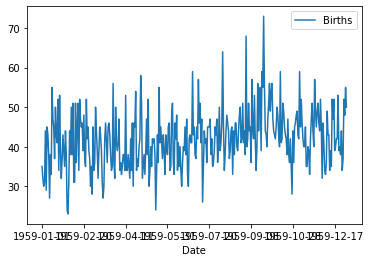

In [4]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('daily-total-female-births.csv', header=0, index_col=0)
print(series.head()) # number of births per date
series.plot()
pyplot.show()

# Moving Average as Data Preparation

Smoothing is useful as a data preparation technique as it can reduce the random variation in the observations and better expose the structure of the underlying causal processes.

The rolling() function on the Series Pandas object will automatically group observations into a window. You can specify the window size, and by default a trailing window is created. Once the window is created, we can take the mean value, and this is our transformed dataset.